### TimML test line-sink discharge

In [1]:
from pylab import *
from timml import *
%matplotlib notebook

In [2]:
ml1 = ModelMaq(kaq=20)
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = LineSinkBase(ml1, x1=-10, y1=-10, x2=10, y2=10, Qls=1000)
ml1.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


In [3]:
print('head at center of line-sink:', ml1.head(ls1.xc, ls1.yc))
print('discharge of line-sink:', ls1.discharge())

head at center of line-sink: [ 19.19104524]
discharge of line-sink: [ 1000.]


In [4]:
ml2 = ModelMaq(kaq=20)
rf2 = Constant(ml2, xr=0, yr=20, hr=30)
N = 20
d = 20 / N
xw = np.arange(-10 + d/2, 10, d)
yw = np.arange(-10 + d/2, 10, d)
for i in range(N):
    Well(ml2, xw[i], yw[i], Qw=1000 / N)
ml2.solve(silent=True)

<IPython.core.display.Javascript object>


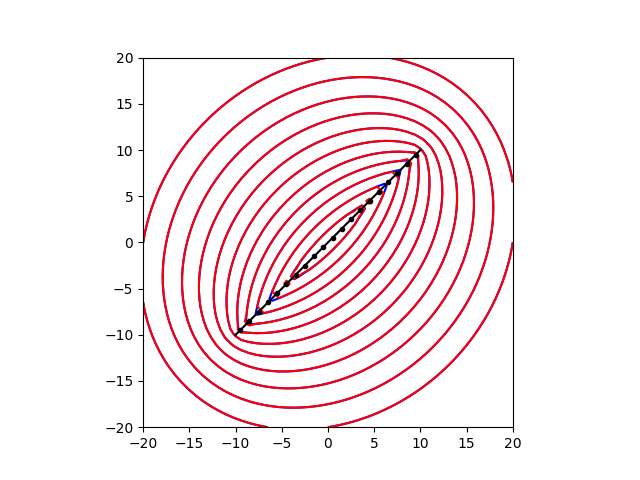

In [5]:
ml1.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='b')
ml2.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='r', newfig=False)

In [6]:
ml1.head(0, 0)

array([ 19.19104524])